# **CSCE 5218 / CSCE 4930 Deep Learning**
# Yasmeen Haleem,11462753
# **HW1a The Perceptron** (20 pt)


In [ ]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat


--2024-02-17 00:58:48--  http://huang.eng.unt.edu/CSCE-5218/test.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K)
Saving to: ‘test.dat’

test.dat            100%[===================>]   2.78K  --.-KB/s    in 0s      

2024-02-17 00:58:48 (224 MB/s) - ‘test.dat’ saved [2844/2844]

--2024-02-17 00:58:48--  http://huang.eng.unt.edu/CSCE-5218/train.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244 (11K)
Saving to: ‘train.dat’

train.dat           100%[===================>]  10.98K  --.-KB/s    in 0s      

2024-02-17 00:58:49 (136 MB/s) - ‘train.dat’ saved [11244/11244]



In [ ]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [ ]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    return NotImplemented


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return NotImplemented

# The output of the model, which for the perceptron is
# the sigmoid function applied to the dot product of
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model
    return NotImplemented

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    return NotImplemented


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate)
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

#code with the changes asked

In [ ]:
import math
import itertools
import re

# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data

def dot_product(array1, array2):
    # Return dot product of array1 and array2
    return sum(x*y for x, y in zip(array1, array2))

def sigmoid(x):
    # Return output of sigmoid function on x
    return 1 / (1 + math.exp(-x))

def output(weight, instance):
    # Return the output of the model
    return sigmoid(dot_product(weight, instance[:-1]))  # Exclude label from instance

def predict(weights, instance):
    # Return the prediction of the model
    model_output = output(weights, instance)
    return 1 if model_output >= 0.5 else 0

# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)

def train_perceptron(instances, lr, epochs):
    # Initialize weights to zeros
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            # Calculate the model's output
            in_value = dot_product(weights, instance[:-1])  # Exclude label from instance
            output_val = sigmoid(in_value)
            # Calculate the error
            error = instance[-1] - output_val
            # Update weights
            for i in range(len(weights)):
                weights[i] += lr * error * output_val * (1 - output_val) * instance[i]

    return weights


## Run it

In [ ]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

####   *Answer Question 1*
**We dont use the predict function  with predict(weights,instance) during training , because the sigmoid function ie sigmoid(in_value) during training ensures that the neural network model can learn from data by adjusting weights based on the computed gradient.
The sigmoid function gives a continuous output that represents the probability of the input being in a particular class and this continuous nature is important in training phase as it allows for gradient calculation and it is a necessary step for gradient based optimization for gradient descent methods.The gradient value indicates howweights need to be adjusted to reduce error between actual and predicted label.
The predict funstion ,usually applies a threshold  usually 0.5 for binary classification to the sigmoid output to make a binary class decision :class 0 or 1.It is useful for making predictions after the model has been trained but not during the training phase.IF the binary output is used while training it would eliminate gradient and making it impossible to perform a meaningful update to the weights.That is the learning algorithm will not know which direction to adjust the weights to reduce the error as the binary output doesnt provide any information about how close or far the prediction is from the actual label.
When training a model with gradient based optimization methods it is necessary to have a differential function that provides a gradient.The sigmoid function satisfies this requirement ,whereas binary threshold function like predict function doent satisfy this requirement.
As can be seen below the accuracy reduces to 32 from 68 when using the predict function**



In [ ]:
import math
import itertools
import re

# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data

def dot_product(array1, array2):
    # Return dot product of array1 and array2
    return sum(x*y for x, y in zip(array1, array2))

def sigmoid(x):
    # Return output of sigmoid function on x
    return 1 / (1 + math.exp(-x))

def output(weight, instance):
    # Return the output of the model
    return sigmoid(dot_product(weight, instance[:-1]))  # Exclude label from instance

def predict(weights, instance):
    # Return the prediction of the model
    model_output = output(weights, instance)
    return 1 if model_output >= 0.5 else 0

# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)

def train_perceptron(instances, lr, epochs):
    # Initialize weights to zeros
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            # Calculate the model's output
            in_value = dot_product(weights, instance[:-1])  # Exclude label from instance
            output_val = sigmoid(in_value)
            # Calculate the error
            error = instance[-1] - output_val
            # Update weights
            for i in range(len(weights)):
                weights[i] += lr * error * output_val * (1 - output_val) * instance[i]

    return weights


In [ ]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


In [ ]:
import math
import itertools
import re

# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data

def dot_product(array1, array2):
    # Return dot product of array1 and array2
    return sum(x*y for x, y in zip(array1, array2))

def sigmoid(x):
    # Return output of sigmoid function on x
    return 1 / (1 + math.exp(-x))

def output(weight, instance):
    # Return the output of the model
    return sigmoid(dot_product(weight, instance[:-1]))  # Exclude label from instance

def predict(weights, instance):
    # Return the prediction of the model
    model_output = output(weights, instance)
    return 1 if model_output >= 0.5 else 0

# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)

def train_perceptron(instances, lr, epochs):
    # Initialize weights to zeros
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            # Calculate the model's output
            in_value = dot_product(weights, instance[:-1])  # Exclude label from instance
            output_val = predict(weights, instance)
            error = instance[-1] - output_val
            # Update weights
            for i in range(len(weights)):
                weights[i] += lr * error * output_val * (1 - output_val) * instance[i]

    return weights


In [ ]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 32.0


### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)


# Answer for Question 2

In [ ]:
import math
import itertools
import re

# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data

def dot_product(array1, array2):
    # Return dot product of array1 and array2
    return sum(x*y for x, y in zip(array1, array2))

def sigmoid(x):
    # Return output of sigmoid function on x
    return 1 / (1 + math.exp(-x))

def output(weight, instance):
    # Return the output of the model
    return sigmoid(dot_product(weight, instance[:-1]))  # Exclude label from instance

def predict(weights, instance):
    # Return the prediction of the model
    model_output = output(weights, instance)
    return 1 if model_output >= 0.5 else 0

# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)

def train_perceptron(instances, lr, epochs):
    # Initialize weights to zeros
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            # Calculate the model's output
            in_value = dot_product(weights, instance[:-1])  # Exclude label from instance
            output_val = sigmoid(in_value)
            # Calculate the error
            error = instance[-1] - output_val
            # Update weights
            for i in range(len(weights)):
                weights[i] += lr * error * output_val * (1 - output_val) * instance[i]

    return weights

In [ ]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


In [ ]:
import math
import itertools
import re


instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100]  # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]      # number of epochs
lr_array = [0.005, 0.01, 0.05]         # learning rate

# Iterate over learning rates
for lr in lr_array:
    # Iterate over training dataset percentages
    for tr_size in tr_percent:
        # Iterate over the number of epochs
        for epochs in num_epochs:
            size = round(len(instances_tr) * tr_size / 100)
            pre_instances = instances_tr[:size]
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)
            print(f"#tr: {len(pre_instances):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")


#tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs

# As can seen above we have calculated the accuracy for the different hyperparameters as asked in Question 2 and the highest accuracy has been acheived for learning rate 0.050 with an accuracy of 80.0

In [ ]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 74.0
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 78.0
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 77.0
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 20, epochs: 100

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



In [ ]:
import math
import itertools
import re

# Assuming read_data, dot_product, sigmoid, output, predict, get_accuracy, and train_perceptron functions are defined as per previous instructions

instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100]  # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]      # number of epochs
lr_array = [0.005, 0.01, 0.05]         # learning rate

# Iterate over learning rates
for lr in lr_array:
    # Iterate over training dataset percentages
    for tr_size in tr_percent:
        # Iterate over the number of epochs
        for epochs in num_epochs:
            size = round(len(instances_tr) * tr_size / 100)
            pre_instances = instances_tr[:size]
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)
            print(f"#tr: {len(pre_instances):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs

In [ ]:
import math
import itertools
import re



instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25,40, 50, 75,90, 100]  # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100,125,155]      # number of epochs
lr_array = [0.004, 0.005, 0.04]         # learning rate

# Iterate over learning rates
for lr in lr_array:
    # Iterate over training dataset percentages
    for tr_size in tr_percent:
        # Iterate over the number of epochs
        for epochs in num_epochs:
            size = round(len(instances_tr) * tr_size / 100)
            pre_instances = instances_tr[:size]
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)
            print(f"#tr: {len(pre_instances):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr:  20, epochs:   5, learning rate: 0.004; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  10, learning rate: 0.004; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  20, learning rate: 0.004; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  50, learning rate: 0.004; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs: 100, learning rate: 0.004; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs: 125, learning rate: 0.004; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs: 155, learning rate: 0.004; Accuracy (test, 100 instances): 69.0
#tr:  40, epochs:   5, learning rate: 0.004; Accuracy (test, 100 instances): 68.0
#tr:  40, epochs:  10, learning rate: 0.004; Accuracy (test, 100 instances): 68.0
#tr:  40, epochs:  20, learning rate: 0.004; Accuracy (test, 100 instances): 68.0
#tr:  40, epochs:  50, learning rate: 0.004; Accuracy (test, 100 instances): 68.0
#tr:  40, epochs: 100, learning rate: 0.004; Accuracy (test, 100 instances): 68.0
#tr:  40, epochs

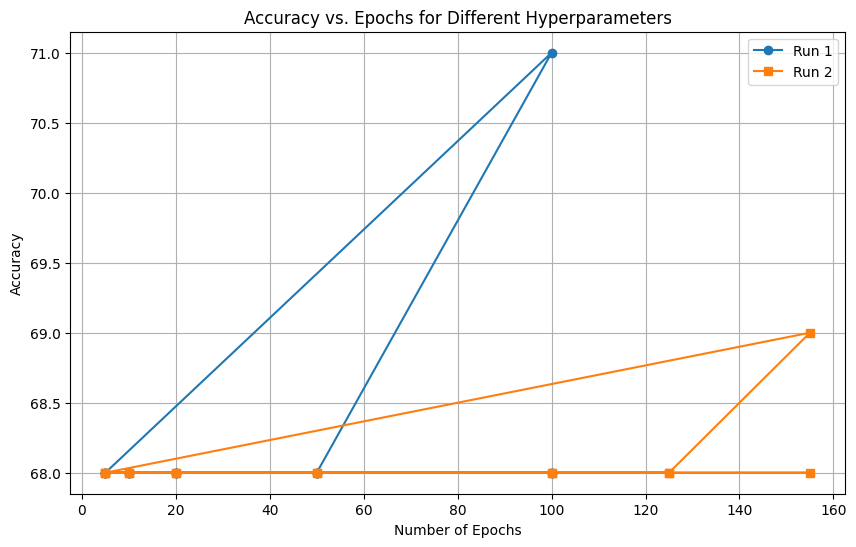

In [ ]:
import matplotlib.pyplot as plt

# Hypothetical results from the two training runs with different hyperparameters
results_run1 = [
    {'tr': 20, 'epochs': 50, 'learning rate': 0.010, 'Accuracy (test, 100 instances)': 68.0},
    {'tr': 20, 'epochs': 100, 'learning rate': 0.010, 'Accuracy (test, 100 instances)': 68.0},
    {'tr': 40, 'epochs': 5, 'learning rate': 0.010, 'Accuracy (test, 100 instances)': 68.0},
    {'tr': 40, 'epochs': 10, 'learning rate': 0.010, 'Accuracy (test, 100 instances)': 68.0},
    {'tr': 40, 'epochs': 20, 'learning rate': 0.010, 'Accuracy (test, 100 instances)': 68.0},
    {'tr': 40, 'epochs': 50, 'learning rate': 0.010, 'Accuracy (test, 100 instances)': 68.0},
    {'tr': 40, 'epochs': 100, 'learning rate': 0.010, 'Accuracy (test, 100 instances)': 68.0},
    {'tr': 100, 'epochs': 5, 'learning rate': 0.010, 'Accuracy (test, 100 instances)': 68.0},
    {'tr': 100, 'epochs': 10, 'learning rate': 0.010, 'Accuracy (test, 100 instances)': 68.0},
    {'tr': 100, 'epochs': 20, 'learning rate': 0.010, 'Accuracy (test, 100 instances)': 68.0},
    {'tr': 100, 'epochs': 50, 'learning rate': 0.010, 'Accuracy (test, 100 instances)': 68.0},
    {'tr': 100, 'epochs': 100, 'learning rate': 0.010, 'Accuracy (test, 100 instances)': 71.0},
    {'tr': 200, 'epochs': 5, 'learning rate': 0.010, 'Accuracy (test, 100 instances)': 68.0},
    {'tr': 200, 'epochs': 10, 'learning rate': 0.010, 'Accuracy (test, 100 instances)': 68.0},
    {'tr': 200, 'epochs': 20, 'learning rate': 0.010, 'Accuracy (test, 100 instances)': 68.0}


]

results_run2 = [
    {'tr': 20, 'epochs': 5, 'learning rate': 0.004, 'Accuracy (test, 100 instances)': 68.0},
    {'tr': 20, 'epochs': 10, 'learning rate': 0.004, 'Accuracy (test, 100 instances)': 68.0},
    {'tr': 20, 'epochs': 20, 'learning rate': 0.004, 'Accuracy (test, 100 instances)': 68.0},
    {'tr': 20, 'epochs': 50, 'learning rate': 0.004, 'Accuracy (test, 100 instances)': 68.0},
    {'tr': 20, 'epochs': 100, 'learning rate': 0.004, 'Accuracy (test, 100 instances)': 68.0},
    {'tr': 20, 'epochs': 125, 'learning rate': 0.004, 'Accuracy (test, 100 instances)': 68.0},
    {'tr': 20, 'epochs': 155, 'learning rate': 0.004, 'Accuracy (test, 100 instances)': 69.0},
    {'tr': 40, 'epochs': 5, 'learning rate': 0.004, 'Accuracy (test, 100 instances)': 68.0},
    {'tr': 40, 'epochs': 10, 'learning rate': 0.004, 'Accuracy (test, 100 instances)': 68.0},
    {'tr': 40, 'epochs': 20, 'learning rate': 0.004, 'Accuracy (test, 100 instances)': 68.0},
    {'tr': 40, 'epochs': 50, 'learning rate': 0.004, 'Accuracy (test, 100 instances)': 68.0},
    {'tr': 40, 'epochs': 100, 'learning rate': 0.004, 'Accuracy (test, 100 instances)': 68.0},
    {'tr': 40, 'epochs': 125, 'learning rate': 0.004, 'Accuracy (test, 100 instances)': 68.0},
    {'tr': 40, 'epochs': 155, 'learning rate': 0.004, 'Accuracy (test, 100 instances)': 68.0},
    {'tr': 100, 'epochs': 5, 'learning rate': 0.004, 'Accuracy (test, 100 instances)': 68.0}


]

# Function to plot results
def plot_results(results, title, marker):
    epochs = [r['epochs'] for r in results]
    accuracies = [r['Accuracy (test, 100 instances)'] for r in results]
    plt.plot(epochs, accuracies, marker, label=title)

plt.figure(figsize=(10, 6))

# Plot results from both runs
plot_results(results_run1, 'Run 1', 'o-')
plot_results(results_run2, 'Run 2', 's-')

plt.title('Accuracy vs. Epochs for Different Hyperparameters')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import math
import itertools
import re

# Assuming read_data, dot_product, sigmoid, output, predict, get_accuracy, and train_perceptron functions are defined as per previous instructions

instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25,40, 50, 75,90, 100]  # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100,125,155,180]      # number of epochs
lr_array = [0.004, 0.005, 0.04,0.003]         # learning rate

# Iterate over learning rates
for lr in lr_array:
    # Iterate over training dataset percentages
    for tr_size in tr_percent:
        # Iterate over the number of epochs
        for epochs in num_epochs:
            size = round(len(instances_tr) * tr_size / 100)
            pre_instances = instances_tr[:size]
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)
            print(f"#tr: {len(pre_instances):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr:  20, epochs:   5, learning rate: 0.004; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  10, learning rate: 0.004; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  20, learning rate: 0.004; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  50, learning rate: 0.004; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs: 100, learning rate: 0.004; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs: 125, learning rate: 0.004; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs: 155, learning rate: 0.004; Accuracy (test, 100 instances): 69.0
#tr:  20, epochs: 180, learning rate: 0.004; Accuracy (test, 100 instances): 68.0
#tr:  40, epochs:   5, learning rate: 0.004; Accuracy (test, 100 instances): 68.0
#tr:  40, epochs:  10, learning rate: 0.004; Accuracy (test, 100 instances): 68.0
#tr:  40, epochs:  20, learning rate: 0.004; Accuracy (test, 100 instances): 68.0
#tr:  40, epochs:  50, learning rate: 0.004; Accuracy (test, 100 instances): 68.0
#tr:  40, epochs

#Answer for Question 3
3.
While observing the output as shown above,the influence of training size is seen on accuracy.For learning rates of 0.005 and 0.010 the accuracy tends to plateua to 68% for snmaller training sizes across various epochs that is the model cant learn further from limited data .But as the training size increases with a learning rate of 0.005 we observe a gradual improvement in accuracy reaching to 78% for training size of 300 and 100 epochs.The learning rate of 0.005 seems to provide stable learning across various conditions ,however increasing learning rate to 0.050 introduces cariability in the outcomes.

3.A)Usually training with the entire dataset doesnot always guarantee highest accuracy on the test dataset.For example  increasing training size from 20 to 100 or even 200 does not consistently lead to higher accuracy across differnt learning rates and epochs in provided results.It suggest that beyond certain point extra training data may not contribute to better generalization due to redundancy in data or model reaching its learning capacity.The quality of training data is as important as quantity.The ability of a model to benefit from more data depends on its capacity.While larger training datasets can provide more opportunities for model to learn and generalize ,it is not a strict requiremnt to use the entire dataset to acheive high accuracy on test dataset.It is necessary to find balance and use techniques like validation,and cross validation to determine the most effective training dataset size for a given problem.

3.B)As can be seen in the above scatter plot,as the number of epochs increases for the RUN 2,the accuracy value decreases.
The decrease in accuracy with more training data in second run,is attributed to interplay between learning rate,quality and diversity of additional data and fixed number of epochs.
The learning rate between the two runs are different:0.050 in first and .005 in second.This difference is significant and can have a substantial impact on training process.
High learning rate(0.050:)A high learning rate may sometimes allow model to escape local minima and potentially reach a better generaralization on test set faster.It also risks overshooting the optimal solution leading to instability in training process.Here high learning rate might have been suitable for smallewr dataset allowing model to converge quickly to reasonable solution.
Low learning rate(0.005):A lower learning rate ensures more stable and gradual updates to model's weights reducing risk of overshooting optimal solution.Increasing the training data size can sometimes lead to overfitting ,especially if model is complex and additional data introduces noise or less relevant patterns.The number of epochs was kept constant at 20 for both runs.With more data the model may require more epochs to learn effectively.The decrease in accuracy in second run with more training data can be attributed to interplay between the learning rate,quality and diversity of additional data and fixed number of training epochs.  
3.C)It could be possible to acheive higher accuracy potentially above 80% with introduction or optimization of additional hyperparameters beyond just the number of training examples ,epochs, and learning rates.It could be done by
(i)Advanced optimization algoithms-Beyond the basic learning rate using advance optimizers like Adam or SGD with momentum can help in more faster and stable convergence.
(ii)Regulariztion tecniques like L1/L2 could be implemented along with drop out or batch normalization could help prevent overfitting and improve models capability
(iii)Adjusting learning rate dynamically during training can lead to better optimization
(iv)Combining predictions of multiple models can sometimes yield better performance than any single model.


 3.D)Training for more epochs does not always guarantee improved model performance and can sometimes be counter productive.
 Overfitting:training for many epochs can lead to overfitting,where model starts to memorize training data,including its noise and outliers,rather than learning to generalize from underlying patternsand it results in decreased performance.
 Beyond a certain point ,extra epochs may not yield any significant improvements in performance as model might have already reached its capacity to learn.
 Training for more epochs can require more computational resources and time and any accuracy gains are minimal and it may not be cost effective startegy.
